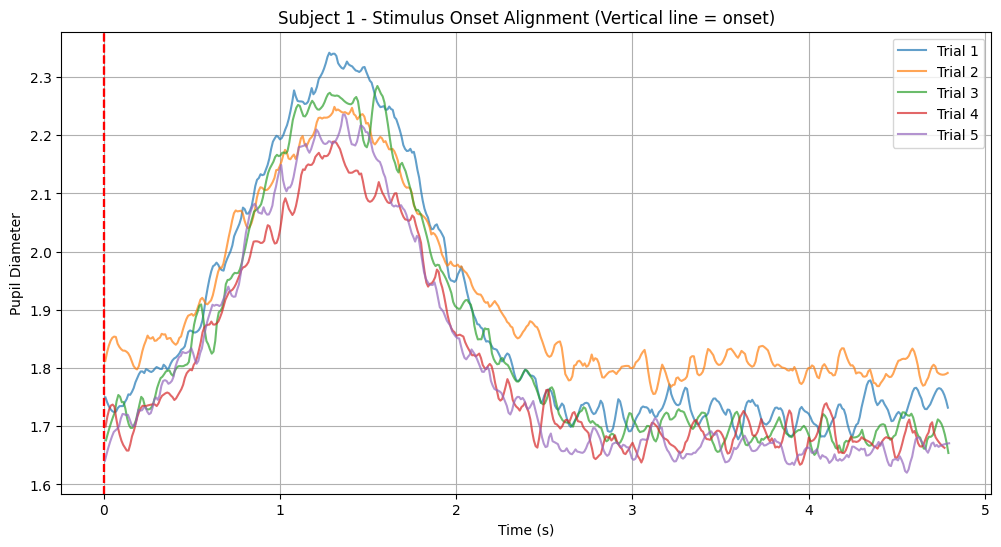

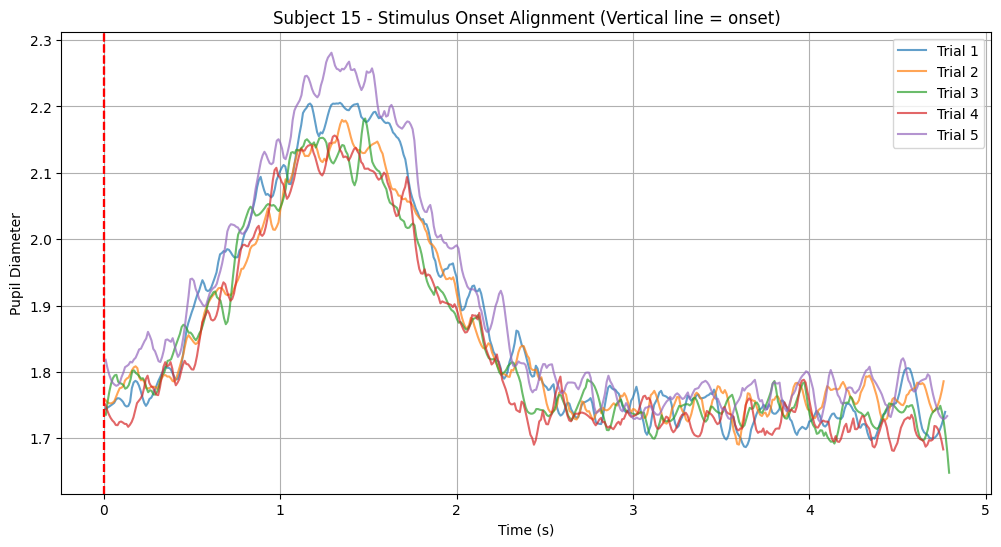

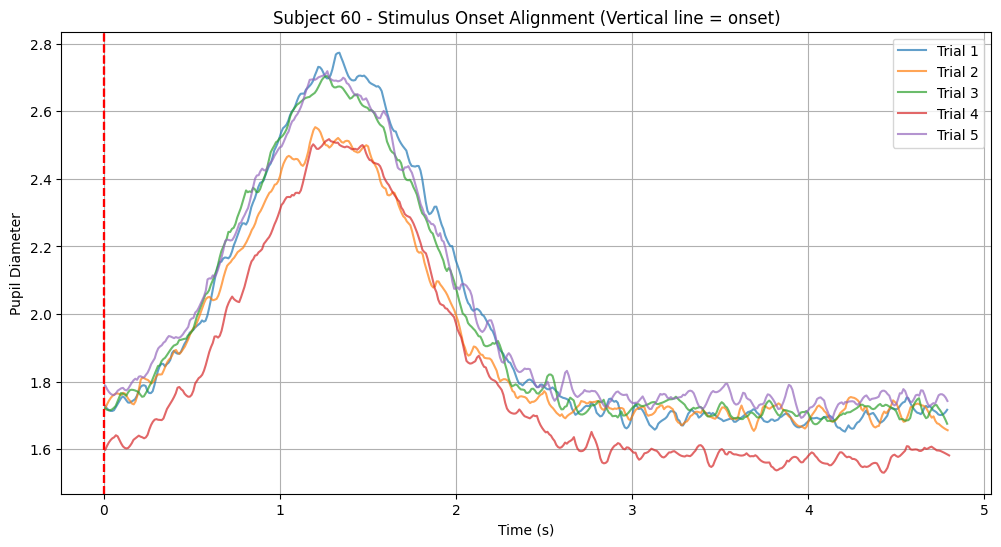

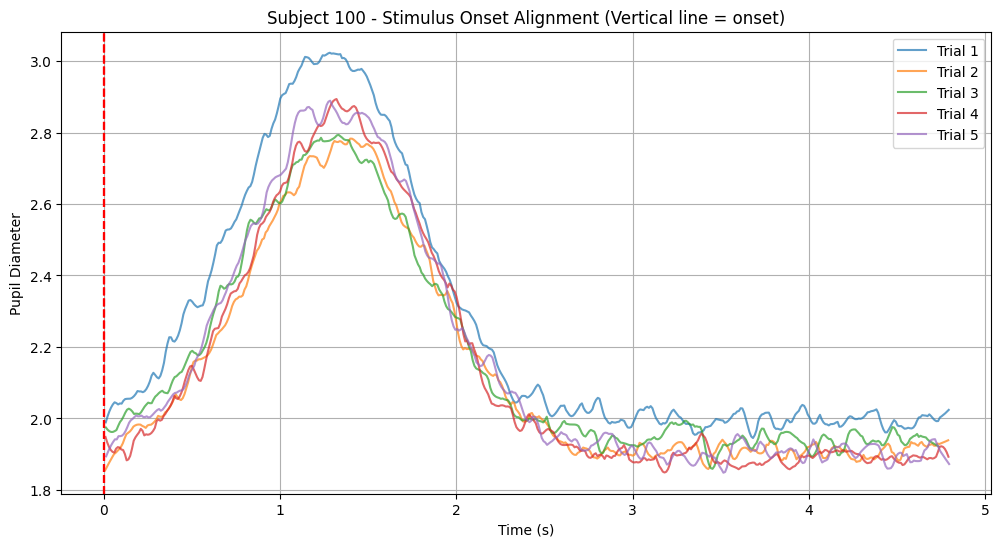

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# =================== CONFIG ===================
DATA_CSV = "pupil_resampled_100Hz_clean.csv"
SUBJECT_TO_PLOT = [1,15,60,100]   # change for other subjects
N_TRIALS = 5          # how many trials to plot
# ==============================================
data = pd.read_csv(DATA_CSV)


def vertical_line_plot(SUBJECT_TO_PLOT, N_TRIALS):
    df_subj = data[data["subjectID"] == SUBJECT_TO_PLOT]

# Pick first N trials
    trials = df_subj["trialID"].unique()[:N_TRIALS]

    plt.figure(figsize=(12, 6))
    for trial in trials:
        df_trial = df_subj[df_subj["trialID"] == trial]
        time = df_trial["time"]
        pupil = df_trial["pupil_clean"] 

        # Plot pupil trace
        plt.plot(time, pupil, label=f"Trial {trial}", alpha=0.7)

        # Since we don't have stim_onset in metadata, assume onset = 0 for each trial
        plt.axvline(0, color="red", linestyle="--", alpha=0.7)

    plt.xlabel("Time (s)")
    plt.ylabel("Pupil Diameter")
    plt.title(f"Subject {SUBJECT_TO_PLOT} - Stimulus Onset Alignment (Vertical line = onset)")
    plt.legend()
    plt.grid(True)
    plt.show()
for _ in SUBJECT_TO_PLOT:    
    vertical_line_plot(_, N_TRIALS)





In [7]:
trial_count=data.groupby('subjectID')['trialID'].nunique().reset_index()
trial_count.columns=['subjectID','n_trials']
print(trial_count.head())
trial_count.to_csv('trial_count.csv',index=False)

   subjectID  n_trials
0          1        17
1          2        19
2          3        20
3          4        18
4          5        20


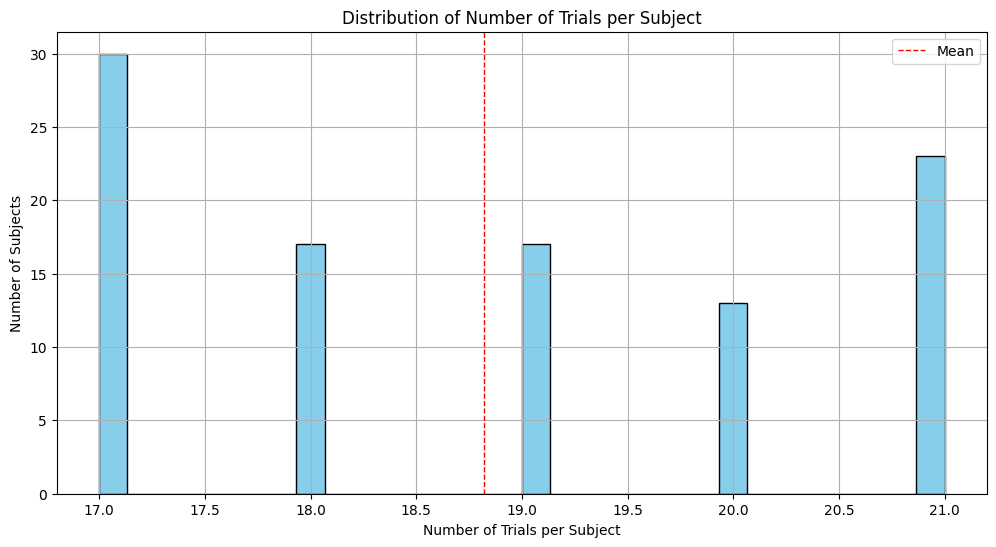

In [10]:
plt.figure(figsize=(12, 6))
plt.hist(trial_count['n_trials'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Trials per Subject')
plt.ylabel('Number of Subjects')
plt.title('Distribution of Number of Trials per Subject')
plt.axvline(trial_count['n_trials'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.grid(True)
plt.show()  

In [12]:
ensemble_avg = (
    data.groupby(["subjectID", "time"])["pupil_clean"]
    .mean()
    .reset_index()
)

# Show first few rows
print(ensemble_avg.head())

# Optionally save
ensemble_avg.to_csv("ensemble_avg_per_subject.csv", index=False)

   subjectID      time  pupil_clean
0          1  0.007314     1.640986
1          1  0.008180     1.736604
2          1  0.008302     1.752694
3          1  0.008683     1.763810
4          1  0.008979     1.848495


In [17]:
def plot_ensemble_avg(SUBJECT_TO_PLOT):
    df_subj_avg = ensemble_avg[ensemble_avg["subjectID"] == SUBJECT_TO_PLOT]

    plt.figure(figsize=(12, 6))
    plt.plot(df_subj_avg["time"], df_subj_avg["pupil_clean"], label=f"Subject {SUBJECT_TO_PLOT}", color="blue")
    plt.axvline(0, color="red", linestyle="--", alpha=0.7)
    plt.xlabel("Time (s)")
    plt.ylabel("Average Pupil Diameter")
    plt.title(f"Subject {SUBJECT_TO_PLOT} - Ensemble Average Pupil Response")
    plt.legend()
    plt.grid(True)
    plt.show()

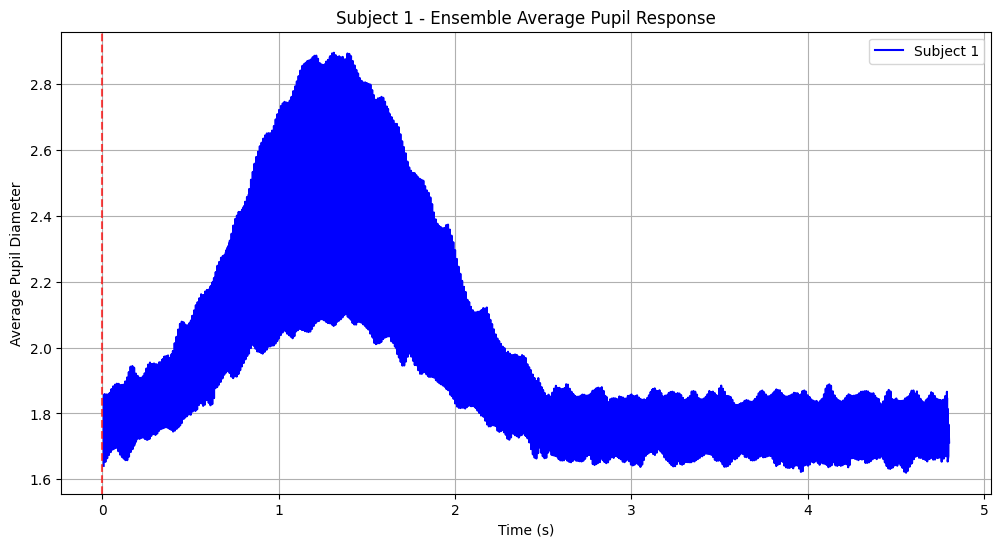

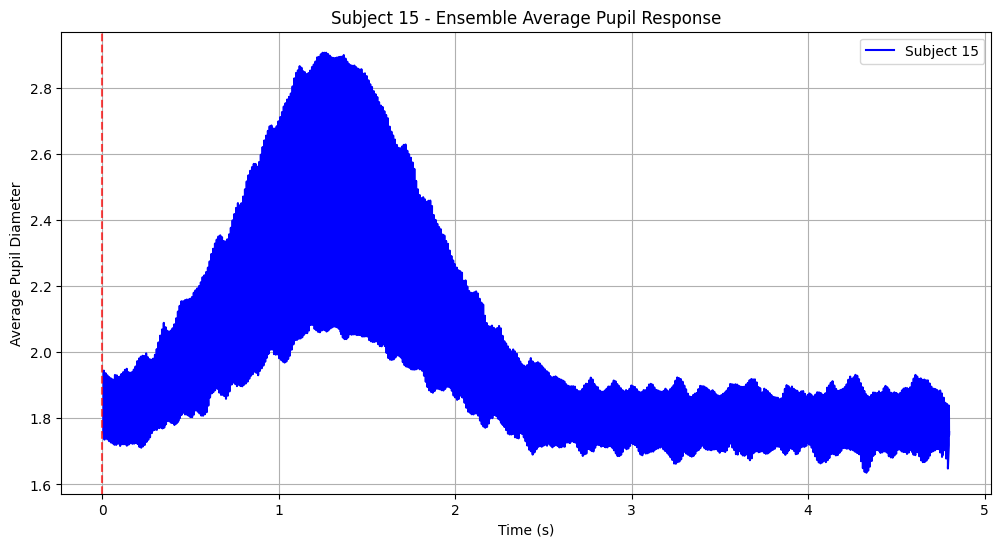

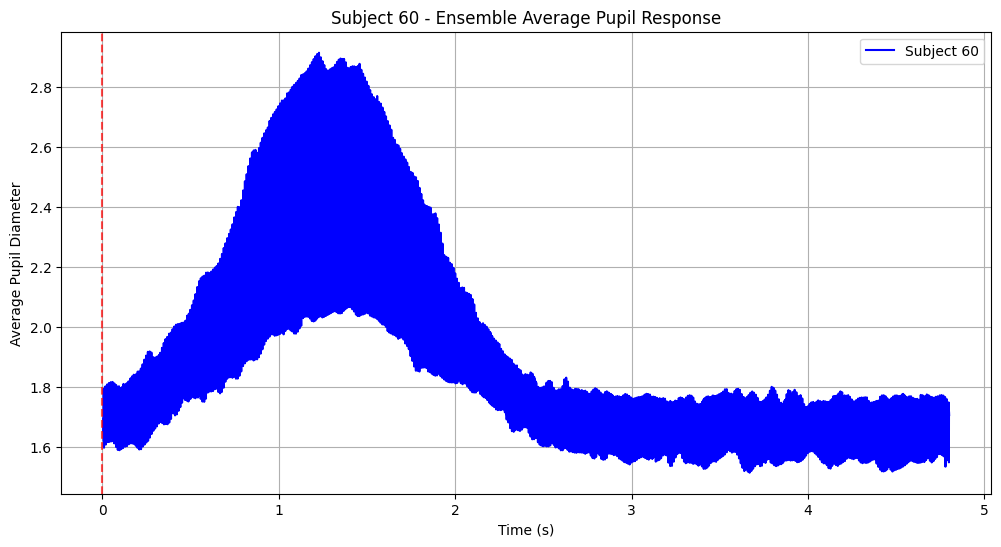

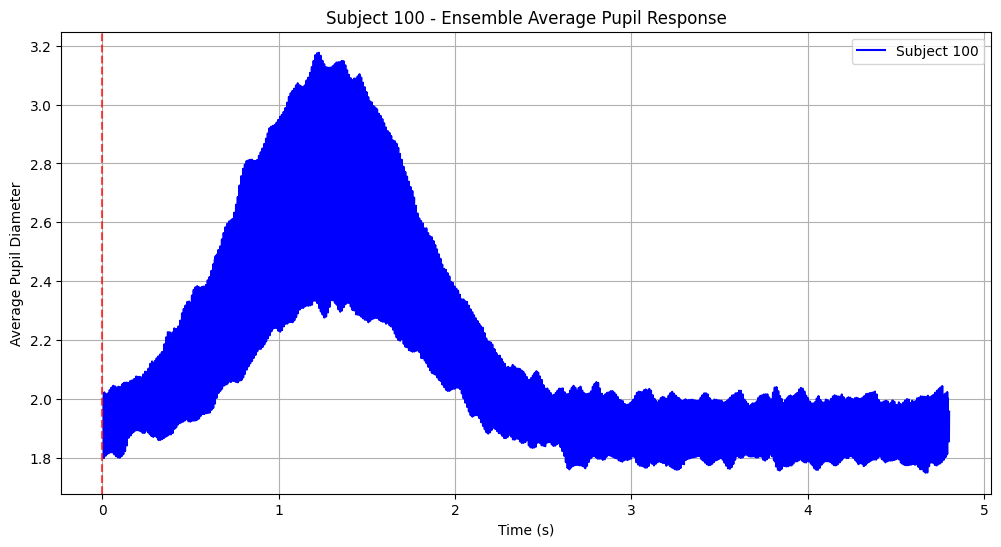

In [18]:
for _ in SUBJECT_TO_PLOT:
    plot_ensemble_avg(_)